##In this data set we'll predict heart attack probablity
##Ihope this notebook be usefull

##Import our needed libraries
##Read our csv dataset with pandas

In [56]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [57]:
df = pd.read_csv('/content/drive/MyDrive/MyFiles-Kaggle-AI/Knn-Amirreza rahimi/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [58]:
df.shape

(303, 14)

In [59]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [61]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [62]:
df.corr()['output'].sort_values(ascending=False)

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64

##Visualize our data 

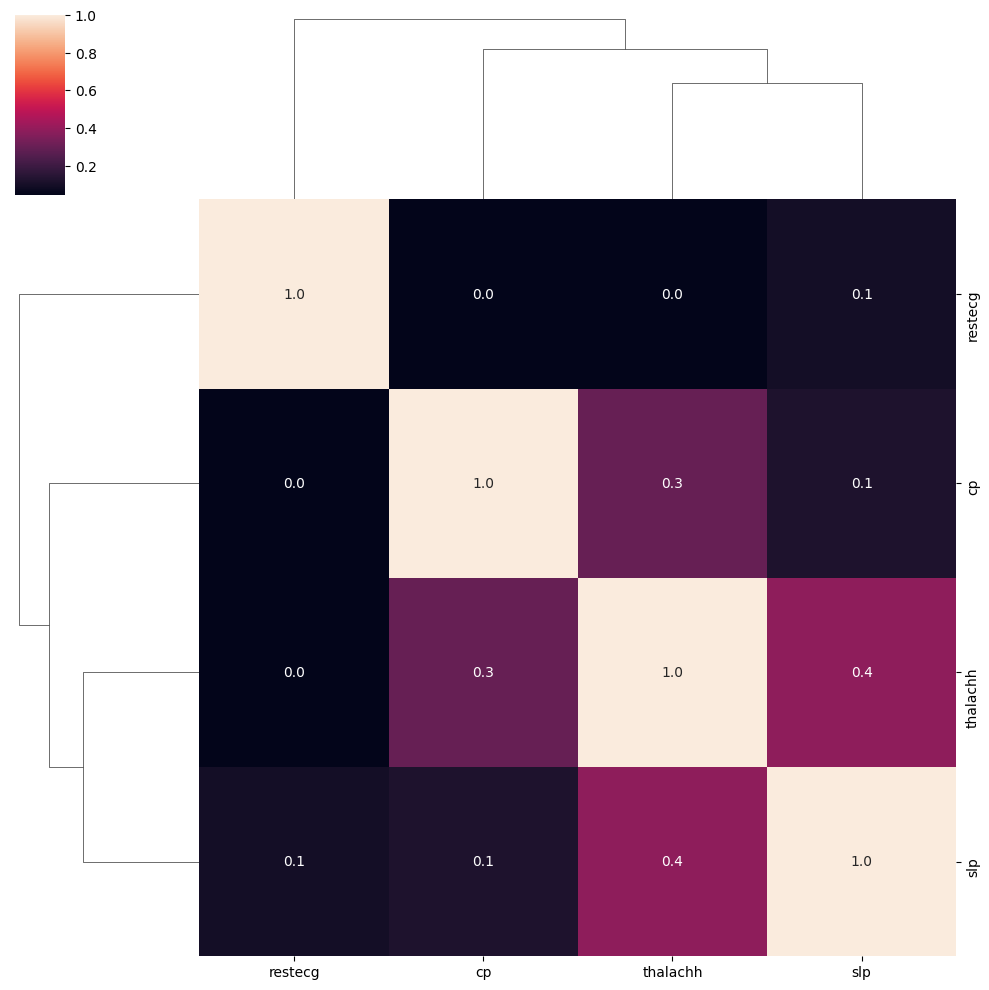

In [63]:
pos_corr = df[['cp', 'thalachh', 'slp', 'restecg']]
sns.clustermap(pos_corr.corr() , annot=True , fmt='.1f')

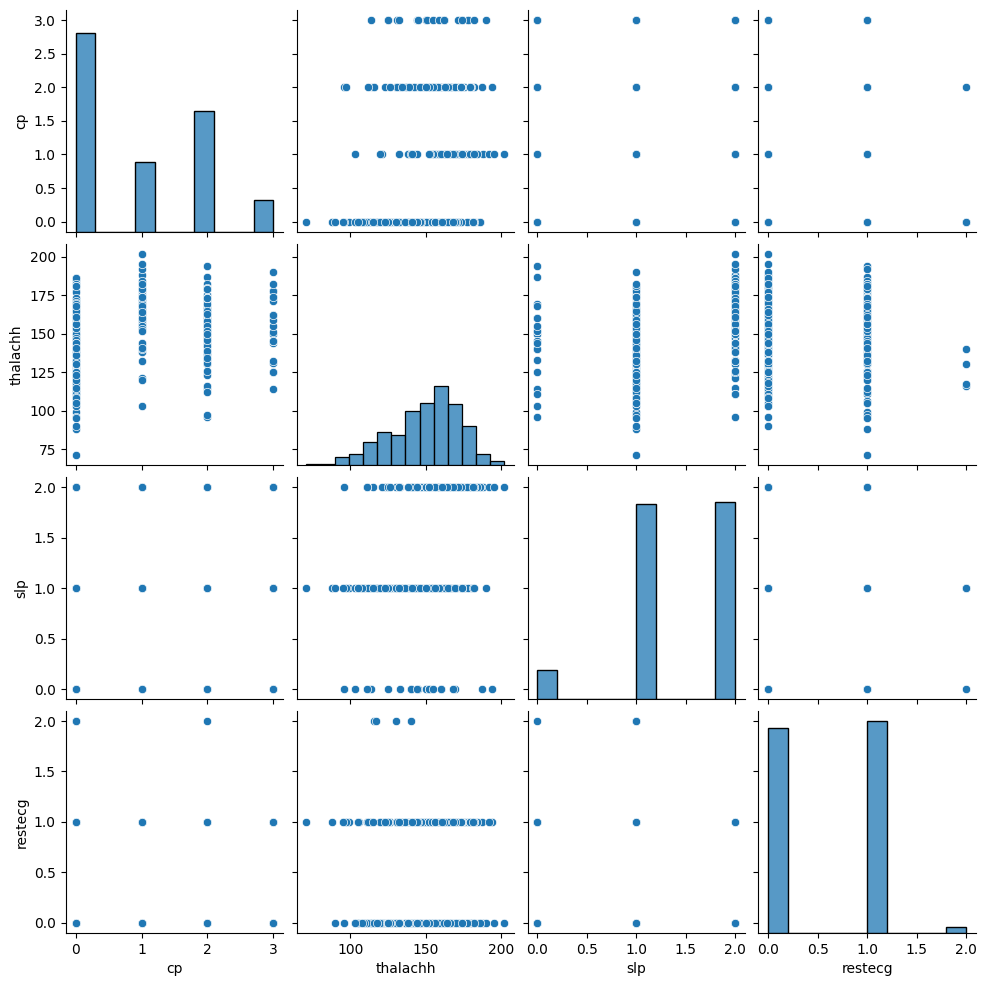

In [64]:
sns.pairplot(df[['cp', 'thalachh', 'slp', 'restecg']])

#Now its time to split our numerical data for using standard scaler on them 
##Then we split our data to X and Y
##And preselect our datas for train and test


In [65]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [66]:
num_features = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']].values

In [67]:
scaler = StandardScaler()

In [72]:
X = scaler.fit_transform(num_features)
X[:5]

array([[ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
         2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
        -2.27457861, -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, -0.09273778,  0.07219949,
        -0.41763453,  0.89896224,  1.63347147, -0.69663055,  2.12257273,
        -2.27457861, -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, -0.09273778, -0.81677269,
        -0.41763453, -1.00583187,  0.97751389, -0.69663055,  0.31091206,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.18017482,  0.68100522,  0.03203122, -0.66386682, -0.19835726,
        -0.41763453,  0.89896224,  1.23989692, -0.69663055, -0.20670527,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.29046364, -1.46841752, -0.93851463, -0.66386682,  2.08204965,
        -0.41763453,  0.89896224,  0.58393935,  1.43548113, -0.37924438,
         0.97635214, -0.71442887, -0.51292188]])

In [71]:
Y = df['output']

In [73]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=4)

##Train our model and predict our test data

In [74]:
k = 4
model = KNeighborsClassifier(n_neighbors=k)

In [75]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [76]:
y_pred = model.predict(x_test)

In [77]:
print("accuracy score of mode: ", accuracy_score(y_test, y_pred))

accuracy score of mode:  0.7142857142857143


#we want yo find better K

In [83]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.72527473, 0.7032967 , 0.72527473, 0.71428571, 0.72527473,
       0.74725275, 0.74725275, 0.72527473, 0.73626374])

In [84]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7472527472527473 with k= 6


##Ichanged hyper parameters and k and result is:
###better K is 6
####because we get better accuracy score and our model gave better performance